# Capstone Project - The Battle of the Neighborhoods 



# Table of contents
      1.Introduction: Business Problem
      2.Data
      3.Methodology
      4.Analysis
      5.Results and Discussion
      6.Conclusion

# Introduction: Business Problem
                     In this project, we are trying to  find a best place to open a new indian restuarant in Toronto,Canada.Since there are lots of restaurants in toronto we will try to detect the locations that are not already crowded with restaurants and focuing mainly in areas where no indian restuarantant in the  neighborhood. This is will help stakeholders who are interested to open new indian restuarant in toronto,canada.

# Data
        * Data containg toronto neighborhood and borough can obtained from wikipedia "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

        *Number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**

#### Import all the packages


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library





Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



#### Toronto dataset

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
result = requests.get(url)       # send the get request and examine the resuts.
df = pd.read_html(result.text,header=0)[0]
df.head(11)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [3]:
df=df[df['Borough'] != 'Not assigned'] #

In [4]:
df.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [5]:
df.reset_index(drop = True, inplace = True)

i = 0 

for i in   range(0,df.shape[0]):
    i = i+1
df.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
df.shape

(103, 3)

In [7]:
toronto_geospatial ="https://cocl.us/Geospatial_data"
geo_data = pd.read_csv(toronto_geospatial).set_index("Postal Code")
geo_data.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [8]:
df_toronto= pd.merge(geo_data,df,on ='Postal Code')  # merge postal code in geo_data
df_toronto.head()

,Postal Code,Latitude,Longitude,Borough,Neighbourhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


In [9]:
df_toronto = df_toronto[['Postal Code','Borough','Neighbourhood','Latitude','Longitude']]
df_toronto.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [10]:
df_toronto = df_toronto[df_toronto['Borough'].str.contains('Toronto')]
df_toronto.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


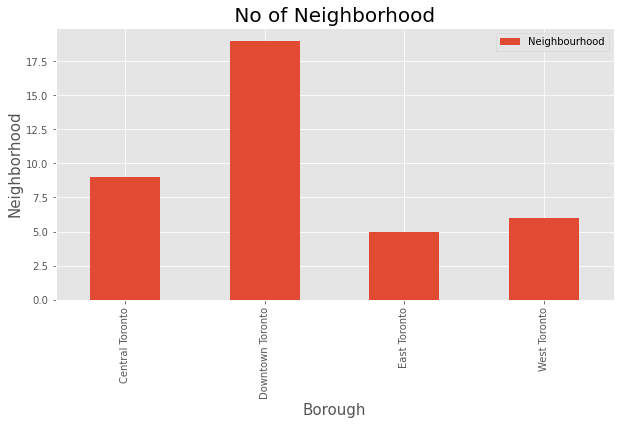

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize =(10,5))
plt.title(" No of Neighborhood ",fontsize = 20)
plt.xlabel("Borough",fontsiZe = 15)
plt.ylabel("Neighborhood", fontsize = 15)
plt.xticks(rotation = 'horizontal')
df_toronto.groupby('Borough')['Neighbourhood'].count().plot(kind = 'bar')
plt.legend()
plt.show()

# Methodlogy 
1.We got the toronto data in the wikipedia url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

2.First we must clean and scrape the wikipedia page and wrangle the data and then read into dataframe.We use "https://cocl.us/Geospatial_data" to get latidues and longitudes for borough and neighborhood in toronto. Then we use Foursquare api to explore the neighborhoods.

3.Then by using Clustering Alogrithm we  cluster the neighborhood based on the indian restuarants.Final datset would be number of indian restuarants in each cluster to find the best place to open a new restuarnt in toronto,canada.

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = '10G3KKFDTRW4UAQSPVZ5ENOFHFR5AWTY3RR3UOOQS4DUVBVX' # your Foursquare ID
CLIENT_SECRET = '4AJANJUVFHI0F2HIVLVN5BV24XJQYNYXCPTY3O3T1AERAVLL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 10G3KKFDTRW4UAQSPVZ5ENOFHFR5AWTY3RR3UOOQS4DUVBVX
CLIENT_SECRET:4AJANJUVFHI0F2HIVLVN5BV24XJQYNYXCPTY3O3T1AERAVLL


In [14]:
print(df_toronto.groupby('Borough').count()['Neighbourhood'])

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
West Toronto         6
Name: Neighbourhood, dtype: int64


In [15]:
boroughs = df_toronto['Borough'].unique().tolist()

#### Coordinates of toronto

In [16]:
lat_toronto = df_toronto['Latitude'].mean()
long_toronto = df_toronto['Longitude'].mean()
print("The geographical coordinates of toronto are {},{}".format(lat_toronto, long_toronto))

The geographical coordinates of toronto are 43.66713498717948,-79.38987324871795


#### Explore Neighborhoods

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )




The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [19]:
toronto_venues.shape

(1615, 7)

In [20]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Beaches,43.676357,-79.293031,Seaspray Restaurant,43.678888,-79.298167,Asian Restaurant


In [21]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,61,61,61,61,61,61
Christie,16,16,16,16,16,16
Church and Wellesley,76,76,76,76,76,76
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,36,36,36,36,36,36


In [22]:
toronto_venues['Venue Category'].unique()[:100]

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood',
       'Asian Restaurant', 'Cosmetics Shop', 'Greek Restaurant',
       'Italian Restaurant', 'Ice Cream Shop', 'Yoga Studio', 'Brewery',
       'Fruit & Vegetable Store', 'Restaurant', 'Pizza Place',
       'Juice Bar', 'Bookstore', 'Furniture / Home Store', 'Dessert Shop',
       'Bubble Tea Shop', 'Spa', 'Coffee Shop', 'Tibetan Restaurant',
       'Bakery', 'Indian Restaurant', 'Grocery Store',
       'Caribbean Restaurant', 'Café', 'Lounge', 'Frozen Yogurt Shop',
       'Liquor Store', 'American Restaurant', 'Gym', 'Fish & Chips Shop',
       'Fast Food Restaurant', 'Sushi Restaurant', 'Park', 'Pet Store',
       'Steakhouse', 'Movie Theater', 'Sandwich Place',
       'Food & Drink Shop', 'Fish Market', 'Seafood Restaurant',
       'Gay Bar', 'Cheese Shop', 'Comfort Food Restaurant',
       'Middle Eastern Restaurant', 'Stationery Store', 'Thai Restaurant',
       'Coworking Space', 'Gastropub', 'Gym / Fitness Center', 'Ba

In [23]:
"Indian Restaurant" in toronto_venues['Venue Category'].unique()

True

#### Analyze Each Neighborhood

In [24]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]


toronto_onehot.shape
toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [25]:
to_grouped = toronto_onehot.groupby(["Neighborhood"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(38, 236)


,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.017857,0.035714,0.000000,0.000000,0.00,0.017857,0.017857,0.000000,0.035714,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.017857,0.00,0.0000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.017857,0.053571,0.089286,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.017857,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,0.000000,0.0000

In [26]:
len(to_grouped[to_grouped["Indian Restaurant"]>0])

7

In [27]:
to_indian = to_grouped[["Neighborhood","Indian Restaurant"]]
to_indian.head(20)

,Neighborhood,Indian Restaurant
0,Berczy Park,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000
2,"Business reply mail Processing Centre, South C...",0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000
4,Central Bay Street,0.016393
5,Christie,0.000000
6,Church and Wellesley,0.013158
7,"Commerce Court, Victoria Hotel",0.000000
8,Davisville,0.027778
9,Davisville North,0.000000


#### Cluster Neighborhoods

In [28]:
from sklearn.cluster import KMeans 

In [30]:
toclusters = 3

to_clustering = to_indian.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=1).fit(to_clustering)
kmeans.fit_transform(to_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int32)

In [31]:
to_merged = to_indian.copy()                   # to_merged = toronto_indian.copy()
to_merged["Cluster Labels"] = kmeans.labels_        #to_merged["Cluster Labels"] = kmeans.labels_

In [32]:
to_merged.rename(columns = {"Neighborhood":"Neighborhood"},inplace = True)
to_merged.head(10)    



,Neighborhood,Indian Restaurant,Cluster Labels
0,Berczy Park,0.000000,1
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,1
2,"Business reply mail Processing Centre, South C...",0.000000,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,1
4,Central Bay Street,0.016393,0
5,Christie,0.000000,1
6,Church and Wellesley,0.013158,0
7,"Commerce Court, Victoria Hotel",0.000000,1
8,Davisville,0.027778,0
9,Davisville North,0.000000,1


In [33]:
to_indian = to_merged.join(toronto_venues.set_index('Neighborhood'),on='Neighborhood')
to_indian.head(30)

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.0,1,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
0,Berczy Park,0.0,1,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
0,Berczy Park,0.0,1,43.644771,-79.373306,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
0,Berczy Park,0.0,1,43.644771,-79.373306,Hockey Hall Of Fame (Hockey Hall of Fame),43.646974,-79.377323,Museum
0,Berczy Park,0.0,1,43.644771,-79.373306,Berczy Park,43.648048,-79.375172,Park
0,Berczy Park,0.0,1,43.644771,-79.373306,St. Lawrence Market (South Building),43.648743,-79.371597,Farmers Market
0,Berczy Park,0.0,1,43.644771,-79.373306,D.W. Alexander,43.648333,-79.373826,Cocktail Bar
0,Berczy Park,0.0,1,43.644771,-79.373306,Eggspectation,43.646526,-79.375134,Breakfast Spot
0,Berczy Park,0.0,1,43.644771,-79.373306,St. Lawrence Market (North Building),43.648793,-79.371945,Farmers Market
0,Berczy Park,0.0,1,43.644771,-79.373306,Market Street Catch,43.648501,-79.371808,Seafood Restaurant


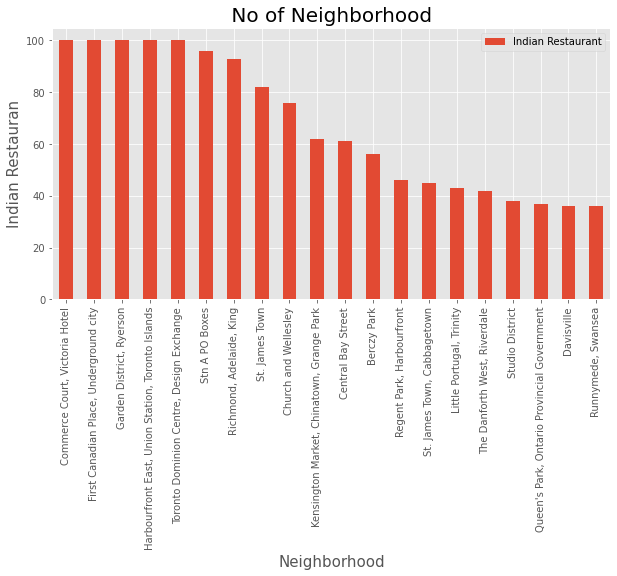

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize =(10,5))
plt.title(" No of Neighborhood ",fontsize = 20)
plt.xlabel("Neighborhood",fontsiZe = 15)
plt.ylabel("Indian Restauran", fontsize = 15)
plt.xticks(rotation = 'horizontal')
to_indian.groupby('Neighborhood')['Indian Restaurant'].count().nlargest(20).plot(kind = 'bar')
plt.legend()
plt.show()

In [36]:
to_indian.sort_values(["Cluster Labels"], inplace = True)
to_indian.tail(10)

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Fet Zun,43.675147,-79.406346,Middle Eastern Restaurant
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Haute Coffee,43.675818,-79.402793,Café
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Dish Cooking Studio,43.674066,-79.410764,Café
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Jean Sibelius Square,43.671426,-79.408831,Park
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Big Crow,43.675896,-79.403680,BBQ Joint
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Madame Boeuf And Flea,43.675240,-79.406620,Burger Joint
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Ezra's Pound,43.675153,-79.405858,Café
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,The Annex Hodgepodge,43.674975,-79.406543,Sandwich Place
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Creeds Coffee Bar,43.674100,-79.410838,Coffee Shop


#### Examine Clusters

In [37]:
to_indian.loc[(to_indian["Cluster Labels"]==0) & (to_indian["Venue Category"]== "Indian Restaurant")]

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
35,"The Danforth West, Riverdale",0.023810,0,43.679557,-79.352188,Sher-E-Punjab,43.677308,-79.353066,Indian Restaurant
6,Church and Wellesley,0.013158,0,43.665860,-79.383160,Kothur Indian Cuisine,43.667872,-79.385659,Indian Restaurant
8,Davisville,0.027778,0,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
14,"Harbourfront East, Union Station, Toronto Islands",0.010000,0,43.640816,-79.381752,Indian Roti House,43.639060,-79.385422,Indian Restaurant
29,"St. James Town, Cabbagetown",0.022222,0,43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
4,Central Bay Street,0.016393,0,43.657952,-79.387383,Colaba Junction,43.660940,-79.385635,Indian Restaurant


In [38]:
to_indian.loc[(to_indian["Cluster Labels"]==1) & (to_indian["Venue Category"]== "Indian Restaurant")]

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [39]:
to_indian.loc[(to_indian["Cluster Labels"]==2) & (to_indian["Venue Category"]== "Indian Restaurant")]

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
33,"The Annex, North Midtown, Yorkville",0.045455,2,43.67271,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant


In [40]:
to_indian.loc[(to_indian["Cluster Labels"]==3) & (to_indian["Venue Category"]== "Indian Restaurant")]

,Neighborhood,Indian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [ ]:
map_clusters = folium.Map(location=[lat_toronto,long_toronto ], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# set color scheme for the clusters
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighbourhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[tocluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_toronto

# Conclusion

Below are the best places to open new indian resturant in toronoto the Annex, North Midtown, Yorkville, St. James Town, Cabbagetown, Church and Wellesley, Central Bay Street.